## Lab Two: Exploring Image Data

_Cameron Curry, Will Epperly, Dylan Embry_

### 1. Business Understanding

##### 1.1 Overview of the Dataset
- This dataset displays a vivid collection of ~925 images representing 25 common bird species found in Inda. Each of the images within the dataset prives a visual represnation of a specific species of bird, creating a pciture of the diverse bird species that appear in India. This dataset serves to display these bird species and is used to classify and build mahcine learning models aiming to accurately identify birds
https://www.kaggle.com/datasets/arjunbasandrai/25-indian-bird-species-with-226k-images

#### 1.2 Purpose of the Dataset
- The primary function fo this dataset is to allow machine learning models to have a dataset to accurately identify bird species. This dataset has a broad spectrum of image representation of these different species of birds. Individuals or organizations interested in ornithology (the science of birds), biodiverisy, or in our case machine learning applications seek to benefit from this dataset. 

#### 1.3 Prediction Task
- The core prediction taks here revolves around creating a machine learning mode to accurately identify the species of birds depicted in provided images. A machine learning model would be trained on these 25 different bird species, and when presented an image of one of these species of birds, accurately predict the species of bird. The aim is to be as accurate as possible as it is could be important in monitoring biodiverity within India and wildlife conservation efforts.

#### 1.4 Thrid Party Interests
- Various organizations might benefit from the insights derived from a predictive model trained on this dataset. To reiterate, wildlife conservation groups, ornithologits, or educational organizations could benefit from this model. Nature enthusiasts or bird watches might benefit from an application that allows them to classify different bird species within India. Organizations involved in conservation efforts and wildlife monitoring would benefit from being able to quickly classify these birds. This would allow them to monitor the population of these birds and their habitats.

#### 1.5 Performance of Prediction Algorithm
- For the prediction algorithm to be deemed successful, it should show a high degree of accuracy at identifying the bird species. As explain on the kaggle dataset, a model was able to accurately classify the bird species with 92% accuracy. This is a relitively high degree of accuracy, and would be considered a success.

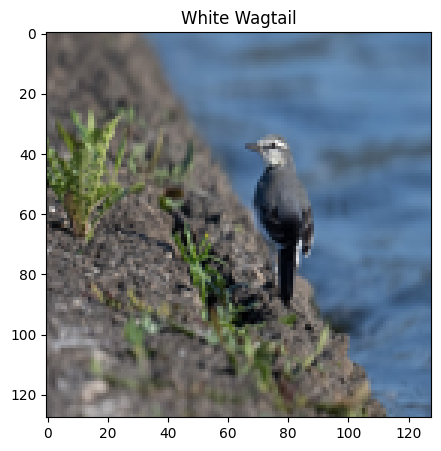

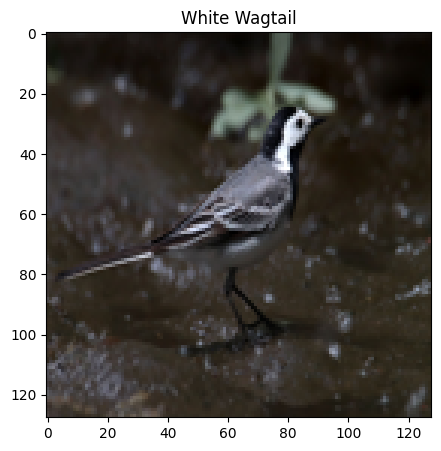

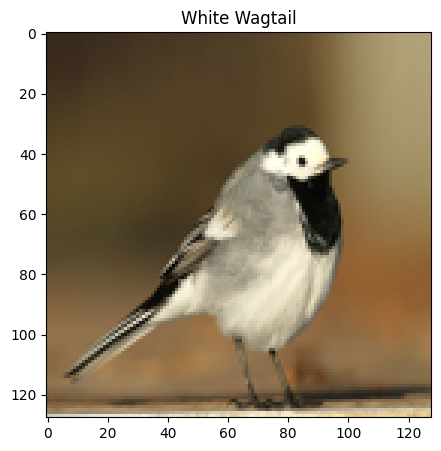

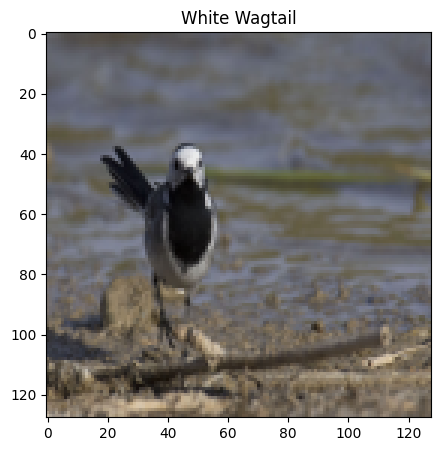

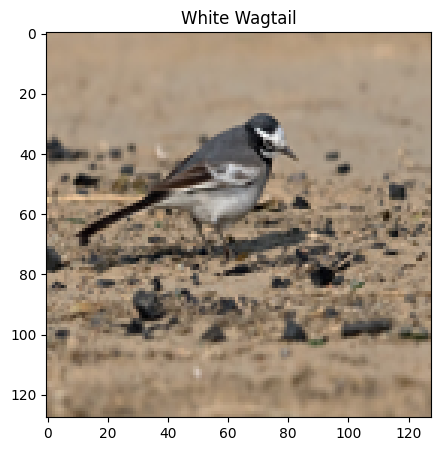

In [9]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Path to the bird files
path = 'archive/training_set/training_set/'

# Placeholder list to store image data and labels
image_data = []
labels = []

# Loop through each sub-directory in the main directory
for bird_dir in os.listdir(path):
    bird_dir_path = os.path.join(path, bird_dir)
    
    # Ensure the path is a directory before proceeding
    if os.path.isdir(bird_dir_path):
        # Loop through each file in the sub-directory
        for file in os.listdir(bird_dir_path):
            file_path = os.path.join(bird_dir_path, file)
            
            # Ensure the path is a file before proceeding
            if os.path.isfile(file_path):
                try:
                    # Open the image file
                    with Image.open(file_path) as img:
                        # Resize the image to 128x128 pixels and convert to RGB
                        img_resized = img.resize((128, 128)).convert('RGB')
                        
                        # Convert image to numpy array and linearize
                        img_array = np.array(img_resized).flatten()
                        
                        # Append image data and label to lists
                        image_data.append(img_array)
                        labels.append(bird_dir)
                except Exception as e:
                    print(f"Could not process {file_path}: {e}")

# Convert list of arrays to an array of arrays
image_data_np = np.vstack(image_data)

# Visualize several images
for i in range(5):  # Adjust range to visualize more or fewer images
    plt.figure(figsize=(5, 5))
    plt.imshow(image_data_np[i].reshape(128, 128, 3))  # Now images are guaranteed to be 128x128 with 3 color channels
    plt.title(labels[i])  # Display the bird species as title
    plt.show()
